In [1]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, recall_score, precision_score, f1_score, confusion_matrix

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset1 = pd.read_csv('createEvent_feb_24.csv',delimiter = ',')
data_neg = dataset1.loc[(dataset1['class']==0) & (dataset1['proj_span']>1.0)]
data_pos = dataset1.loc[(dataset1['class']==1) & (dataset1['proj_span']>1.0)]
print(data_neg.shape)
print(data_pos.shape)

(8260, 96)
(1449, 96)


In [3]:
dataset = pd.read_csv('createEvent_feb_24.csv',delimiter = ',')
# dataset1 = pd.read_csv('test_createEvent_12_18.csv',delimiter = ',') # this one does not take care the CRAN before GH date

In [4]:
X = (dataset.drop('class', axis=1)).drop('id', axis=1)
y = dataset['class']
dataset.shape

(29286, 96)

In [5]:
playset = pd.read_csv('createEvent_feb_7.csv',delimiter = ',')
playset[playset['final_teamsize'] > 500]

,activity_intensity,class,contribution_30_10,contribution_50_30,contribution_below_10,contribution_over_50,final_teamsize,first_quater_teamsize,id,max_contribution_percentage,...,num_Issues,num_Member,num_Public,num_PullRequest,num_PullRequestReviewComment,num_Push,num_Release,num_TeamAdd,num_Watch,proj_span
2232,4.417542,1,1,1,1046,0,1048,1048,hadley-dplyr,0.366611,...,1450,1,0,872,504,1020,7,0,593,1619
13742,0.696673,0,0,0,588,0,588,588,bcaffo-Caffo-Coursera,0.056180,...,1,1,0,17,0,47,0,0,263,1022
13814,27.013793,0,0,0,39641,0,39641,39641,rdpeng-ProgrammingAssignment2,0.000743,...,5,0,0,4353,34,5,0,0,122,1595


In [6]:
dataset.describe()

,activity_intensity,class,contribution_30_10,contribution_50_30,contribution_below_10,contribution_over_50,final_teamsize,first_quater_teamsize,majority_contribution_time,max_contribution_percentage,...,num_TeamAdd_Q4,num_Watch,num_Watch_Q1,num_Watch_Q2,num_Watch_Q3,num_Watch_Q4,num_joint_project,num_joint_success_project,proj_span,team_age_in_days
count,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,...,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000,29286.000000
mean,2.032372,0.241890,0.087789,0.055999,1.897221,0.970327,3.011336,3.011336,0.514990,0.961830,...,0.000205,0.358567,0.077409,0.104692,0.107457,0.109472,1931.859011,1057.497781,58.686266,152.457693
std,3.694424,0.428236,0.444698,0.298088,231.831024,0.169686,231.825169,231.825169,0.499784,0.123158,...,0.014312,6.030359,1.785391,1.838624,1.592290,1.353979,3929.881167,2164.228317,193.306612,226.302552
min,0.001577,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.857143,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,25.000000
75%,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,8.000000,8.000000,243.000000
max,403.000000,1.000000,9.000000,3.000000,39641.000000,1.000000,39641.000000,39641.000000,1.000000,1.000000,...,1.000000,593.000000,211.000000,170.000000,152.000000,88.000000,10065.000000,10057.000000,2258.000000,1019.000000


In [7]:
X_tr_val, X_test, y_tr_val, y_test = train_test_split(X, y, test_size=0.2, random_state=20190101)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_val, y_tr_val, test_size=0.25, random_state=20190207)
print('training size: ', X_tr.shape[0])
print('validation size: ', X_val.shape[0])
print('test size: ', X_test.shape[0])

training size:  17571
validation size:  5857
test size:  5858


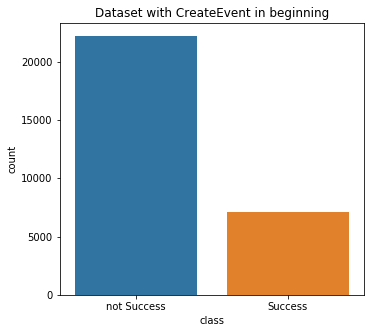

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(x='class', data=dataset)
ax1.set_xticklabels(['not Success', 'Success'])
plt.title('Dataset with CreateEvent in beginning')
# ax2 = plt.subplot(1,2,2)
# sns.countplot(x='class', data=dataset1)
# ax2.set_xticklabels(['not Success', 'Success'])
# plt.title('Dataset don\'t care CRAN before GH')
plt.show()

In [9]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_val)

Classification accuracy of the LogisticRegression classifier on training set: 0.95003
Precision on train: 0.96847
Recall on train: 0.81633

Classification accuracy of the LogisticRegression classifier on val set: 0.94980
Precision on val: 0.97174
Recall on val: 0.81805


array([[4394,   34],
       [ 260, 1169]])

In [10]:
ca = lr.score(X_test, y_test)
y_pred_1 = lr.predict(X_test)
p = precision_score(y_pred=y_pred_1,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred_1, y_true=y_test, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on val set: 0.94674
Precision on val: 0.97247
Recall on val: 0.81204


In [11]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-4.21571792e-01 -2.23385452e-02 -2.43860880e-02  2.46281463e-01
  -3.99310174e-01 -1.99753344e-01 -1.99753344e-01 -2.04175482e-01
  -4.07336736e-01  1.53469839e-04  1.21815614e-02  8.68030904e-03
   6.65350857e-04  3.26314450e-03 -1.84197681e-03  7.46765383e-02
  -2.68777092e-01 -1.56137041e-01 -5.35223698e-02 -8.95272636e-02
   1.19179818e-01  2.61292894e-02  4.10849640e-02  3.33532820e-02
   2.98185588e-02  1.57204069e-03  2.80266859e-03 -1.34040408e-03
  -3.86982210e-04 -3.04506058e-04  3.35634934e-02  3.67231185e-03
   1.39280255e-03 -9.74830043e-03  7.02932996e-03  1.66565144e-02
   9.67263827e-03 -4.42615398e-03 -4.43425928e-03  1.13076704e-02
  -2.72945619e-02  1.90190295e-02 -3.26527073e-02  5.67412363e-03
  -1.93763123e-02  2.23387570e-02  2.00409041e-02 -1.49545950e-02
   9.15477727e-03  6.63423690e-03 -1.17931812e-02 -6.52921768e-03
  -5.63581882e-03 -2.61667341e-03 -4.23303274e-03 -2.48898317e-03
  -9.16169723e-04 -8.32729324e-04 -9.11625925e-04 -1.06434663e-03
   4.32281

In [12]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

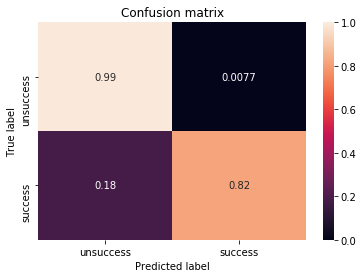

In [13]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [14]:
clf = GaussianNB()
clf.fit(X_tr, y_tr)
ca = clf.score(X_tr, y_tr)
print('Classification accuracy of the Naive Bayes classifier on training set: {:.5f}'.format(ca))
y_pred = clf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))
ca = clf.score(X_val, y_val)
y_pred = clf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the Naive Bayes classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))
confusion_matrix(y_pred=y_pred, y_true=y_val)

Classification accuracy of the Naive Bayes classifier on training set: 0.94178
Precision on train: 0.93299
Recall on train: 0.81346

Classification accuracy of the Naive Bayes classifier on val set: 0.94110
Precision on val: 0.93639
Recall on val: 0.81386


array([[4349,   79],
       [ 266, 1163]])

In [15]:
# transform the data
ss = StandardScaler()
ss.fit(X_tr)
X_tr = ss.transform(X_tr)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [16]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
ca = lr.score(X_tr, y_tr)
print('Classification accuracy of the LogisticRegression classifier on training set: {:.5f}'.format(ca))
y_pred = lr.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

ca = lr.score(X_val, y_val)
y_pred = lr.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('\nClassification accuracy of the LogisticRegression classifier on val set: {:.5f}'.format(ca))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Classification accuracy of the LogisticRegression classifier on training set: 0.94997
Precision on train: 0.98216
Recall on train: 0.80412

Classification accuracy of the LogisticRegression classifier on val set: 0.94758
Precision on val: 0.97382
Recall on val: 0.80686


In [17]:
# display coef for logistic regression model
print(lr.coef_)
print(lr.intercept_)

[[-4.68518287e-01  8.79818694e-02  2.13275580e-01  4.25221776e-01
   3.05482073e-01  4.38874481e-01  4.38874481e-01 -5.34461860e-02
  -2.12853404e-01  2.30928958e-01 -4.23669062e-01  3.28584711e-01
   8.62223880e-03  7.02199466e-02  5.20713737e-02  4.05198966e-01
   8.50549204e-02 -1.06444146e-03  3.89239324e-02 -2.35333160e-01
  -6.27102881e-01  1.95489208e-01  2.31865739e-01  1.20911015e-01
   2.45404602e-01 -7.36602239e-02  6.56174844e-02 -4.90977673e-01
  -8.18144489e-02 -7.13662224e-02  9.46193241e-01 -2.68253543e-01
  -2.08032229e-01 -5.87904822e-01 -6.64539576e-01 -1.52815816e-01
   7.97954507e-02  6.02228991e-02  3.69299366e-03  3.37141057e-02
  -4.39477213e-01  2.49334870e-01  4.32279301e-02 -1.88843056e-01
   1.45580953e-01 -5.47036247e-01  1.92601158e-01  3.33716574e-01
  -3.67700428e-02  8.97323201e-02  6.82664398e-02 -9.54188443e-02
  -6.40369757e-02 -3.91023475e-02 -5.82817059e-02 -1.71628481e-01
  -2.85998123e-01 -1.41359954e-01 -2.28612277e-01  1.08519616e-01
  -1.01301

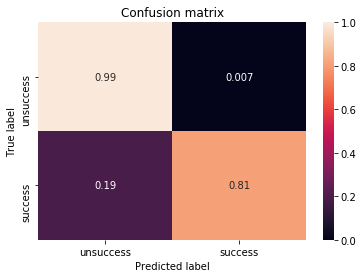

In [18]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)
y_pred = rf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
accuracy_score_train = rf.score(X_tr, y_tr)
print('Accuracy score on the training dataset: {}'.format(accuracy_score_train))
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

# test set
y_pred = rf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
accuracy_score_val = rf.score(X_val, y_val)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Accuracy score on the training dataset: 0.9976096977975073
Precision on train: 0.99928
Recall on train: 0.99066

Accuracy score on the val dataset: 0.97507
Precision on val: 0.98709
Recall on val: 0.90973


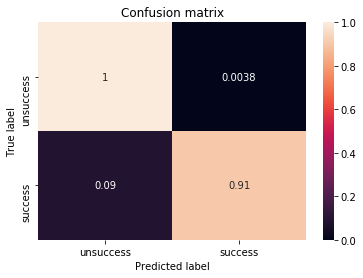

In [20]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_val)
# retrive the normalized version of cm
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes=['unsuccess','success'])
plt.show()

In [21]:
features = X.columns[:].values.tolist()
important_features = rf.feature_importances_
feature_index = np.argsort(important_features)[::-1]
print('Names of the 10 most important features:')
for n in range(10):
    print("{}. {}".format(n+1, features[feature_index[n]]))

Names of the 10 most important features:
1. num_joint_project
2. num_joint_success_project
3. team_age_in_days
4. num_Create_Q2
5. num_Create_Q3
6. num_Create
7. num_Push
8. num_Push_Q3
9. activity_intensity
10. normalized_proj_span


In [22]:
# test set
y_pred = rf.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
accuracy_score_val = rf.score(X_test, y_test)
print('\nAccuracy score on the val dataset: {:.5f}'.format(accuracy_score_val))
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Accuracy score on the val dataset: 0.97354
Precision on val: 0.98748
Recall on val: 0.90669


In [23]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_tr, y_tr)
ca = svc_linear.score(X_tr, y_tr)
print('Linear SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_linear.score(X_val, y_val)
print('Linear SVC classification accuracy on val set: {:.5f}'.format(ca))

Linear SVC classification accuracy on training set: 0.94929
Linear SVC classification accuracy on val set: 0.94775


In [24]:


svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_tr, y_tr)
ca = svc_rbf.score(X_tr, y_tr)
print('\nRadial Basis Function SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_rbf.score(X_val, y_val)
print('Radial Basis Function SVC classification accuracy on val set: {:.5f}'.format(ca))




Radial Basis Function SVC classification accuracy on training set: 0.95635
Radial Basis Function SVC classification accuracy on val set: 0.94639


In [25]:
y_pred = svc_rbf.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = svc_rbf.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))


Precision on train: 0.99796
Recall on train: 0.81801
Precision on val: 0.99206
Recall on val: 0.78656


In [26]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_tr, y_tr)
ca = svc_poly.score(X_tr, y_tr)
print('\nPolynomial SVC classification accuracy on training set: {:.5f}'.format(ca))
ca = svc_poly.score(X_val, y_val)
print('Polynomial SVC classification accuracy on val set: {:.5f}'.format(ca))


Polynomial SVC classification accuracy on training set: 0.95720
Polynomial SVC classification accuracy on val set: 0.94502


In [27]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=2019)
mlp.fit(X_tr, y_tr)
y_pred = mlp.predict(X_tr)
p = precision_score(y_pred=y_pred,y_true=y_tr, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_tr, pos_label=1)
print('Precision on train: {:.5f}'.format(p))
print('Recall on train: {:.5f}'.format(r))

y_pred = mlp.predict(X_val)
p = precision_score(y_pred=y_pred,y_true=y_val, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_val, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Precision on train: 0.96996
Recall on train: 0.84267
Precision on val: 0.94923
Recall on val: 0.82435


In [28]:
y_pred = mlp.predict(X_test)
p = precision_score(y_pred=y_pred,y_true=y_test, pos_label=1)
r = recall_score(y_pred=y_pred, y_true=y_test, pos_label=1)
print('Precision on val: {:.5f}'.format(p))
print('Recall on val: {:.5f}'.format(r))

Precision on val: 0.93975
Recall on val: 0.81204
